In [1]:
import pandas as pd 
import re
import jieba 
import nltk
import matplotlib.pyplot as plt
import platform

from wordcloud import WordCloud
from nltk.corpus import stopwords



SG_WORDS_RAW_FILEPATH = 'src/sg_words.txt'
SG_WORDS_CLEAN_FILEPATH = 'src/sg_words_clean.txt'


# 判断操作系统
FONT_PATH = r'C:\Windows\Fonts\simsun.ttc'
if platform.system() == 'Windows':
    # Windows中的一个常见中文字体
    FONT_PATH = r'C:\Windows\Fonts\simhei.ttf'
elif platform.system() == 'Darwin':  # Darwin是macOS的核心系统
    # macOS中的一个常见中文字体
    FONT_PATH = '/System/Library/Fonts/STHeiti Medium.ttc'
    

In [2]:
def clean_text(text):
    # 去除HTML标签
    text = re.sub(r'<[^>]+>', '', text)
    
    # 去除网址链接
    text = re.sub(r'http\S+', '', text)
    
    # 去除特殊符号和标点（保留中文和英文句号）
    text = re.sub(r'[^\w\s。.]', '', text)
    
    # 去除表情符号（根据实际情况可能需要定制正则表达式）
    text = re.sub(r'\[.*?\]', '', text)
    
    # 去除空格和换行符
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 去除无意义的数字和单字
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\b\w\b', '', text)
    
    #
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s,，]', '', text)
    
    return text



In [3]:
# 读取文件并去重
with open(SG_WORDS_RAW_FILEPATH, 'r', encoding='utf-8') as file:
    unique_lines = set(file.readlines())

# 写回到新文件
with open(SG_WORDS_CLEAN_FILEPATH, 'w', encoding='utf-8') as file:
    file.writelines(sorted(unique_lines))

jieba.load_userdict(SG_WORDS_CLEAN_FILEPATH)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/vv/l1nxsvcs5d527y988btrb1s00000gn/T/jieba.cache
Loading model cost 0.698 seconds.
Prefix dict has been built successfully.


In [4]:
df_cmt1 = pd.read_csv('src/xhs_review_raw_2023-11-06.csv', encoding='utf_8_sig', index_col=False)
df_cmt2 = pd.read_csv('src/xhs_review_raw_2024-02-12.csv', encoding='utf_8_sig', index_col=False)
df_usr1 = pd.read_csv('src/xhs_user_raw_2023-11-06.csv', encoding='utf_8_sig', index_col=False)
df_usr2 = pd.read_csv('src/xhs_user_raw_2024-02-12.csv', encoding='utf_8_sig', index_col=False)

df_cmt = pd.concat([df_cmt1, df_cmt2], ignore_index=True)
df_usr = pd.concat([df_usr1, df_usr2], ignore_index=True)

df_cmt = df_cmt.drop_duplicates(subset='noteid')
print(f"df cmt shape: {df_cmt.shape}")

df_usr = df_usr.drop_duplicates(subset='userid')
print(f"df user shape: {df_usr.shape}")

# df_cmt = df_cmt.head().copy()
# df_cmt = df_cmt.copy()
# df_cmt = df_cmt
df_cmt['content']

df cmt shape: (4657, 21)
df user shape: (2575, 10)


0       【滨海湾花园】推荐指数⭐⭐⭐⭐推荐去，最推荐云雾林！买票的时候可以多几个平台看看，一般都是套...
1       想要在滨海湾花园，拍出热带沙漠氛围感满满的打卡照？✨✨✨步入�仙人掌绿亭（Sun Pavil...
2       新加坡如果从怡丰城去圣淘沙要4新币坐大巴进去圣淘沙然后想去怡丰城逛街吃饭吃完饭想回圣淘沙发现...
3       刷小红书发现很多樟宜机场的攻略比较零散，亲自跑了一回，想说按照去程和返程把可能需要在樟宜机场...
4       虽然还有两个月才到圣诞节，但激动的心情已经难以掩饰� 第40个年头的“乌节路大街欢”又要来啦...
                              ...                        
8051                                                  NaN
8059                                                  NaN
8096                                                  NaN
8301                                                  NaN
8302                                                  NaN
Name: content, Length: 4657, dtype: object

In [5]:
df_cmt = df_cmt[df_cmt['content'] != 'NaN'].reset_index()
df_cmt['content']

0       【滨海湾花园】推荐指数⭐⭐⭐⭐推荐去，最推荐云雾林！买票的时候可以多几个平台看看，一般都是套...
1       想要在滨海湾花园，拍出热带沙漠氛围感满满的打卡照？✨✨✨步入�仙人掌绿亭（Sun Pavil...
2       新加坡如果从怡丰城去圣淘沙要4新币坐大巴进去圣淘沙然后想去怡丰城逛街吃饭吃完饭想回圣淘沙发现...
3       刷小红书发现很多樟宜机场的攻略比较零散，亲自跑了一回，想说按照去程和返程把可能需要在樟宜机场...
4       虽然还有两个月才到圣诞节，但激动的心情已经难以掩饰� 第40个年头的“乌节路大街欢”又要来啦...
                              ...                        
4652                                                  NaN
4653                                                  NaN
4654                                                  NaN
4655                                                  NaN
4656                                                  NaN
Name: content, Length: 4657, dtype: object

In [6]:
# 应用清洗函数
df_cmt['content'] = df_cmt['content'].apply(str)
df_cmt['cleaned_content'] = df_cmt['content'].apply(clean_text)

# 查看清洗后的结果
print(df_cmt['content'])
print(df_cmt['cleaned_content'])


0       【滨海湾花园】推荐指数⭐⭐⭐⭐推荐去，最推荐云雾林！买票的时候可以多几个平台看看，一般都是套...
1       想要在滨海湾花园，拍出热带沙漠氛围感满满的打卡照？✨✨✨步入�仙人掌绿亭（Sun Pavil...
2       新加坡如果从怡丰城去圣淘沙要4新币坐大巴进去圣淘沙然后想去怡丰城逛街吃饭吃完饭想回圣淘沙发现...
3       刷小红书发现很多樟宜机场的攻略比较零散，亲自跑了一回，想说按照去程和返程把可能需要在樟宜机场...
4       虽然还有两个月才到圣诞节，但激动的心情已经难以掩饰� 第40个年头的“乌节路大街欢”又要来啦...
                              ...                        
4652                                                  nan
4653                                                  nan
4654                                                  nan
4655                                                  nan
4656                                                  nan
Name: content, Length: 4657, dtype: object
0       滨海湾花园推荐指数推荐去最推荐云雾林买票的时候可以多几个平台看看一般都是套票纠结的话买云雾林...
1       想要在滨海湾花园拍出热带沙漠氛围感满满的打卡照步入仙人掌绿亭Sun Pavilion扑面而来...
2       新加坡如果从怡丰城去圣淘沙要新币坐大巴进去圣淘沙然后想去怡丰城逛街吃饭吃完饭想回圣淘沙发现忘...
3       刷小红书发现很多樟宜机场的攻略比较零散亲自跑了一回想说按照去程和返程把可能需要在樟宜机场做的...
4       虽然还有两个月才到圣诞节但激动的心情已经难以掩饰 第个年头的乌节路大街欢又要来啦   日起乌...
                             

In [7]:

# 分词
df_cmt['cleaned_content'] = df_cmt['cleaned_content'].apply(lambda x: ' '.join(jieba.cut(x)))

# 加载停用词表并去除停用词
# from github https://github.com/stopwords-iso/stopwords-zh
stopwords_mannual = [line.strip() for line in open('src/stopwords-zh.txt', encoding='UTF-8').readlines()]
df_cmt['cleaned_content'] = df_cmt['cleaned_content'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords_mannual))

# from nltk
nltk.download('stopwords')
stopwords_cn_list = stopwords.words('chinese')
df_cmt['cleaned_content'] = df_cmt['cleaned_content'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords_cn_list))

df_cmt['cleaned_content']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sichengliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       滨海湾 花园 推荐 指数 推荐 推荐 云雾 林 买票 几个 平台 套票 纠结 买 云雾 林花...
1       想要 滨海湾 花园 拍 出 热带 沙漠 氛围 感 满满的 打卡 步入 仙人掌 绿亭 Sun ...
2       新加坡 怡丰城 圣淘沙 新币 坐 大巴 进去 圣淘沙 想 怡丰城 逛街 吃饭 吃完饭 想回 ...
3       刷小红书 发现 很多 樟宜机场 攻略 零散 亲自 跑 一回 想 去程 返程 樟宜机场 事情 ...
4       两个 圣诞节 激动 心情 难以 掩饰 第个 年头 乌节路 大街 欢 日起 乌节路 亮灯 节日...
                              ...                        
4652                                                  nan
4653                                                  nan
4654                                                  nan
4655                                                  nan
4656                                                  nan
Name: cleaned_content, Length: 4657, dtype: object

In [8]:
# remove null 
df_cmt = df_cmt.dropna(subset=['cleaned_content'])
df_cmt = df_cmt[df_cmt['content'] != 'nan']
df_cmt = df_cmt[df_cmt['content'] != 'NaN']
df_cmt = df_cmt.reset_index()

df_cmt['cleaned_content']

0       滨海湾 花园 推荐 指数 推荐 推荐 云雾 林 买票 几个 平台 套票 纠结 买 云雾 林花...
1       想要 滨海湾 花园 拍 出 热带 沙漠 氛围 感 满满的 打卡 步入 仙人掌 绿亭 Sun ...
2       新加坡 怡丰城 圣淘沙 新币 坐 大巴 进去 圣淘沙 想 怡丰城 逛街 吃饭 吃完饭 想回 ...
3       刷小红书 发现 很多 樟宜机场 攻略 零散 亲自 跑 一回 想 去程 返程 樟宜机场 事情 ...
4       两个 圣诞节 激动 心情 难以 掩饰 第个 年头 乌节路 大街 欢 日起 乌节路 亮灯 节日...
                              ...                        
4126    Marcys 一家 融合 拉美 意大利 海岸线 风格 海鲜 酒馆 装修 超级 氛围 感 复古...
4127    新加坡 brunch 想到 一家 店 Bearded Bella 坐落 tanjong pa...
4128    正好 免签 新加坡 玩笑 哭 R 朋友 顺路来 奇迹 坐 坐 菜单 饮品 几个 甜品 打卡 ...
4129    上周 一趟 新加坡 真的 太热 不愧 靠近 赤道 国家 紫外线 猛烈 好好 做好 防晒 不止...
4130    快 过年 淘儿 回国 一趟 挠头 伴手 礼 新加坡 盆友 自告奋勇 带 买买 买 一圈 真心...
Name: cleaned_content, Length: 4131, dtype: object

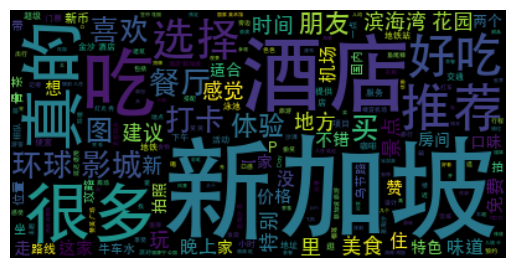

In [9]:
# 生成词云
text = ' '.join(df_cmt['cleaned_content'])
wordcloud = WordCloud(font_path=FONT_PATH).generate(text)

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
from collections import Counter

# 假设'cleaned_content'是清洗后的文本数据
words = ' '.join(df_cmt['cleaned_content']).split()
word_counts = Counter(words)

# 获取最常见的词汇
common_words = word_counts.most_common(20)
print(common_words)




[('新加坡', 8656), ('酒店', 5489), ('R', 5025), ('吃', 2435), ('真的', 1682), ('很多', 1327), ('圣淘沙', 1305), ('滨海湾', 1288), ('好吃', 1286), ('推荐', 1263), ('免费', 1262), ('花园', 1242), ('买', 1194), ('打卡', 1107), ('餐厅', 1071), ('时间', 1066), ('提前', 1041), ('美食', 984), ('金沙', 949), ('分钟', 896)]


In [12]:
from snownlp import SnowNLP

# 简单的情感分析示例
def get_sentiment_cn(text):
    try:
        s = SnowNLP(text)
        return s.sentiments
    except ZeroDivisionError:
        return None  # 或者选择一个合适的默认值，比如中性情感0.5
    
#     try:
#         s = SnowNLP(text)
#     except:
#         print(text)
    
#     s = SnowNLP(text)
#     return s.sentiments  # 返回值是情感倾向，越接近1表示越正面，越接近0表示越负面


# 应用到你的DataFrame
df_cmt['sentiment'] = df_cmt['cleaned_content'].apply(get_sentiment_cn)
df_cmt['sentiment']

0       1.00000
1       1.00000
2       1.00000
3       0.00266
4       1.00000
         ...   
4126    1.00000
4127    1.00000
4128    1.00000
4129    1.00000
4130    1.00000
Name: sentiment, Length: 4131, dtype: float64

In [ ]:
from gensim import corpora, models

# 建立词典
dictionary = corpora.Dictionary(df_cmt['cleaned_content'].apply(lambda x: x.split()))

# 建立语料库
corpus = [dictionary.doc2bow(text.split()) for text in df_cmt['cleaned_content']]

# LDA模型训练
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# 打印主题
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


In [ ]:
# df_cmt.to_csv("src/clean_data/xhs_review.csv", mode='a+', index=False, encoding='utf_8_sig')
# df_usr.to_csv("src/clean_data/xhs_user.csv", mode='a+', index=True, encoding='utf_8_sig')